# **Bias in AI-Driven Housing Price Predictions: A Case Study of the New York Metropolitan Area.**

## **Introduction**

Automated valuation models (AVMs), like Zillow’s Zestimate, significantly influence modern real estate by providing estimated housing prices based on extensive data analytics. These models advertise impartiality and efficiency through machine learning algorithms that aggregate large-scale datasets covering property features, local trends, and market conditions (Angwin et al., 2016; Barocas & Selbst, 2016). However, emerging evidence indicates these technologies may inadvertently perpetuate or exacerbate existing socioeconomic and racial inequalities in housing markets (Fu et al., 2020; Acolin & Wachter, 2022).

Our research critically examines Zillow’s AVM against Airbnb pricing data to identify potential biases. This inquiry assesses whether AVMs offer impartial and efficient valuations or if underlying biases disproportionately impact specific demographics. We explore the following research questions:

1. Are housing prices inflated more in some demographic regions due to AI-driven pricing models?
2. How do algorithmic predictions compare to actual market trends in diverse socioeconomic neighborhoods?
3. What demographic factors correlate most strongly with discrepancies in AI-predicted versus actual rent values?
4. How does short-term rental activity influence AI-driven New York Metro Area price estimates?

## **Data Overview**

We compared rental prices from:
- **Zillow’s Zestimate AVM**: Specifically, the Zillow Observed Rent Index (ZORI), aggregated from March 2024 to February 2025.
- **Airbnb**: Data from Inside Airbnb, using listings from March 2025, focused on “Entire Home/Apt” listings.
- **Demographic Data**: Sourced from NYU Furman Center’s CoreData.NYC, including racial, income, and poverty metrics (last updated May 19, 2023).


We compared rental prices from Zillow’s Zestimate AVM, specifically utilizing Zillow’s Observed Rent Index (ZORI), which aggregates monthly rental data. We averaged ZORI values from March 2024 to February 2025 (Zillow Research, 2024). For Airbnb, we sourced listing prices from Inside Airbnb, averaging prices from the latest available month (March 2025) specifically for “Entire Home/Apt” listings (Inside Airbnb, 2025). Demographic information was sourced from NYU Furman Center’s CoreData. NYC includes detailed neighborhood-level data such as median household income, racial and ethnic composition percentages, and poverty rates. The latest demographic dataset was updated on May 19, 2023 (NYU Furman Center, 2023).

Due to resource constraints, our analysis targeted nine strategically selected NYC neighborhoods (two from each borough) to ensure demographic diversity and manageable data processing. These neighborhoods provided an essential range for examining potential biases across racial and socioeconomic lines.

In [ ]:
import pandas as pd
# suppress warnings
pd.options.mode.chained_assignment = None
pd.options.mode.copy_on_write = True

# Load cleaned datasets
zillow_df = pd.read_csv("cleaned_zillow_rent_data.csv")
airbnb_df = pd.read_csv("cleaned_airbnb_data.csv")
demographics_df = pd.read_csv("cleaned_demographics_data.csv")

In [ ]:
zillow_df.head()

,Neighborhood,AverageRent
0,Bay Ridge,2375.213515
1,Jamaica,2412.165388
2,Williamsbridge / Baychester,2431.938584
3,Flatlands / Canarsie,2595.068791
4,East Harlem,2887.972211


### Zillow Data

Zillow’s Zestimate model, which we used for our analysis, integrates county and tax records data, direct feeds from multiple listings, brokerages, and user-submitted information. This model leverages home characteristics, market conditions, and broader trends. Zillow openly acknowledges estimation errors, reporting median error rates of 1.94% for on-market homes and 7.06% for off-market homes nationally; specifically in New York, error rates are 2.96% for on-market and 7.79% for off-market homes (Zillow Research, 2024). This transparency about estimation errors is crucial for our analysis, as it allows us to be fully aware of potential biases that may still arise, primarily due to reliance on tax records and publicly submitted data, which may unevenly represent immigrant and lower-income communities.

In [ ]:
airbnb_df.head()

,id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price
0,6848,Brooklyn,Williamsburg,40.709350,-73.953420,Entire home/apt,81.0
1,7801,Brooklyn,Williamsburg,40.718807,-73.956177,Entire home/apt,310.0
2,16974,Manhattan,East Harlem,40.801900,-73.937620,Entire home/apt,300.0
3,19812,Brooklyn,Williamsburg,40.718020,-73.957240,Entire home/apt,105.0
4,28907,Manhattan,Upper East Side,40.778270,-73.946690,Entire home/apt,150.0


### Airbnb Data

Airbnb data was collected through Inside Airbnb, an independent initiative not endorsed by Airbnb. This dataset comprises publicly available listings, reviews, and calendar availability, aggregated by neighborhood using geographic coordinates aligned with official city neighborhood boundaries (Inside Airbnb, 2025). The independence of this initiative ensures the objectivity of the data. However, it is important to note that due to the data collection methodology, the listings represent a snapshot and might exclude deleted listings at the aggregation time.

In [ ]:
demographics_df.head()

,region_id,region_name,region_type,year,pop_race_asian_pct,pop_race_white_pct,pop_race_black_pct,pop_race_hisp_pct
0,106,Upper East Side,Sub-Borough Area,2021,9.4%,73.4%,3.2%,9.7%
1,109,East Harlem,Sub-Borough Area,2021,9.7%,13.9%,29.5%,43.0%
2,210,Williamsbridge/Baychester,Sub-Borough Area,2021,1.9%,6.4%,55.9%,31.8%
3,301,Williamsburg/Greenpoint,Sub-Borough Area,2021,7.6%,59.4%,3.8%,22.2%
4,304,Bushwick,Sub-Borough Area,2021,8.2%,24.0%,15.7%,47.6%


### Demographic Data

Demographic data from NYU Furman Center’s CoreData. The NYC platform utilizes definitions consistent with New York City’s neighborhood boundaries and derives its information directly from the U.S. Census Bureau, providing accurate representations of neighborhood demographics (NYU Furman Center, 2023).

## **Data Cleaning and Preperation**

Data from all sources underwent a rigorous and thorough cleaning process, ensuring the highest level of data integrity and reliability for our analysis:
*   Standardized column names for consistency.
*   Removed unnecessary data columns and missing values.
*  Condensed Airbnb data specifically to include neighborhood, latitude, longitude, room type, and pricing information, focusing exclusively on entire homes/apartments.
*  Averaged Airbnb listings per neighborhood to obtain mean monthly rental values.
*  Filtered the demographic data specifically for the year 2021, matching selected neighborhoods.
*   Zillow data required additional processing, as it was initially organized by ZIP Code rather than neighborhood. We manually mapped ZIP Codes to neighborhoods, averaging rental data across 12 months and appropriately assigning values when ZIP Codes overlapped neighborhood boundaries.




## **Methods**


In our analysis of ten selected New York City neighborhoods, we examined the average Airbnb rental prices for entire home or apartment listings. By focusing exclusively on full-home listings—excluding private rooms, hotel rooms, and shared accommodations—we aimed to more accurately capture the pricing trends across neighborhoods.

Among the neighborhoods analyzed, the Upper East Side had the highest average Airbnb rental price at \$257.72 per night (as seen in Fig 1.1). In contrast, Williamsbridge recorded the lowest, with an average nightly rate of \$115.68. Geographically, the Upper East Side is located in Manhattan, while Williamsbridge is situated in the Bronx.

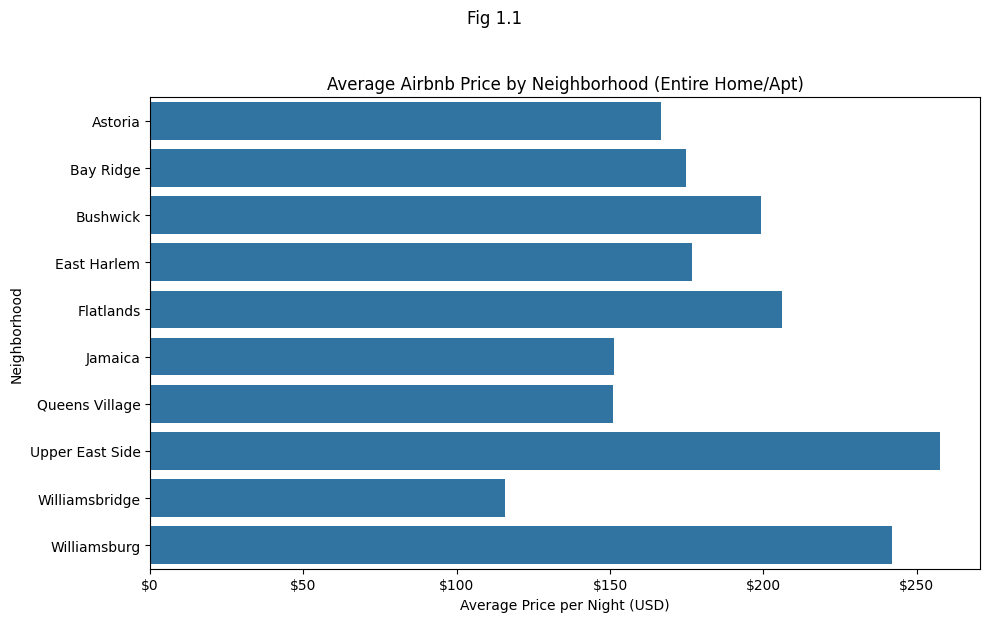

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Plot using seaborn
avg_prices = airbnb_df.groupby('neighbourhood')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_prices, x='price', y='neighbourhood')

plt.title('Average Airbnb Price by Neighborhood (Entire Home/Apt)')
plt.suptitle("Fig 1.1", fontsize=12, y=1.03)
plt.xlabel('Average Price per Night (USD)')
plt.ylabel('Neighborhood')

# Format x-axis as dollars
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f"${x:,.0f}"))

plt.tight_layout()
plt.savefig("avg_airbnb_price_by_neighborhood.png", dpi=300, bbox_inches='tight')
plt.show()

![Bar chart showing average Airbnb rental price per night for entire home/apartment listings across NYC neighborhoods](1.1_Average_Airbnb_Price_by_Neighborhood.png)

*Fig 1.1: Average Airbnb Price by Neighborhood (Entire Home/Apt)*

These rental trends (as seen in Fig 1.2) align closely with Zillow’s Zestimate data on rental values. The Upper East Side again led with the second highest average estimated rent value at \$3,846.63 (the highest being Williamsburg (Brooklyn) at \$4,158.59). On the lower end, Bay Ridge (Brooklyn) had an average rental value of \$2,375.21, followed closely by Jamaica (Queens) at \$2,412.17. These disparities in pricing may be influenced by various factors such as amenities (e.g., yard space, parking, water-front property), access to public resources (e.g., parks, transportation), and borough-specific characteristics. While homes outside Manhattan tend to offer more yard space, public transit access is relatively consistent across Queens, the Bronx, and Brooklyn.

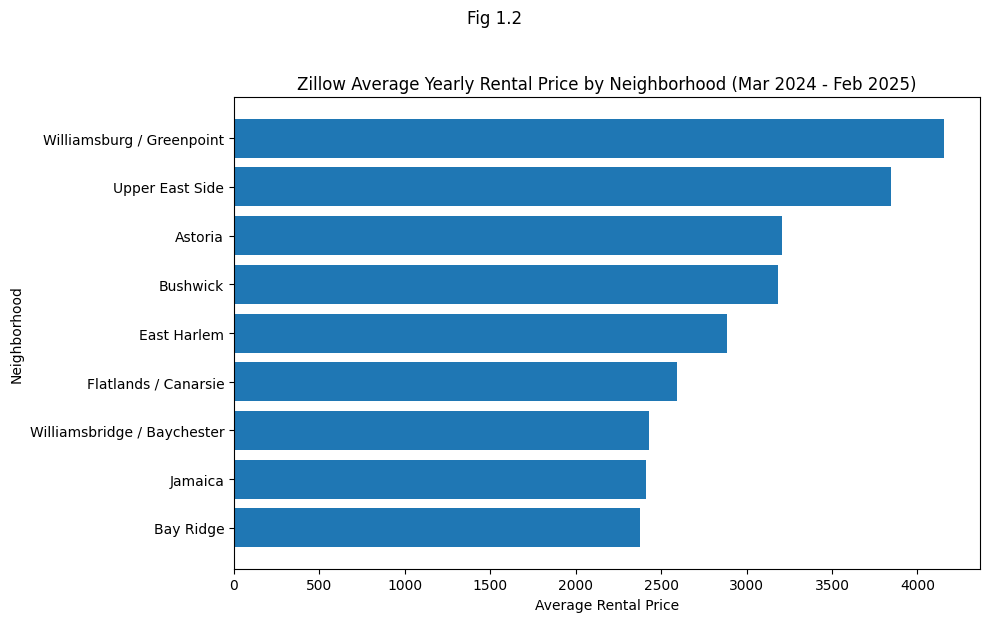

In [ ]:
# Plot a horizontal bar graph of average yearly rent by neighborhood using Zillow Data
plt.figure(figsize=(10,6))
plt.barh(zillow_df["Neighborhood"], zillow_df["AverageRent"])
plt.xlabel("Average Rental Price")
plt.ylabel("Neighborhood")
plt.title("Zillow Average Yearly Rental Price by Neighborhood (Mar 2024 - Feb 2025)")
plt.suptitle("Fig 1.2", fontsize=12, y=1.03)
plt.tight_layout()
plt.savefig("zillow_prices.png", dpi=300, bbox_inches='tight')
plt.show()

![Horizontal bar chart showing Zillow average yearly rental prices by NYC neighborhood from March 2024 to February 2025](1.2_Zillow_Average_Yearly_Rental_Price_by_Neighborhood.png)

*Fig 1.2: Zillow Average Yearly Rental Price by Neighborhood (Mar 2024 – Feb 2025)*


A key concern emerging from our findings is the correlation between neighborhood pricing and racial demographics. When comparing the racial composition of these neighborhoods, we observed strikingly similar patterns to those seen in both Airbnb rental rates and Zestimate rental values. The Upper East Side, which had the highest property values, also had the highest percentage of white residents. In contrast, Jamaica and Williamsbridge—both among the least expensive neighborhoods—had the lowest percentages of white residents and the highest proportions of Black residents. Canarsie, a Brooklyn neighborhood, followed this pattern as well, ranking third-lowest in Zestimate values and also having a high Black population. The one neighborhood that doesn’t follow this trend is Bay Ridge with a white population of over 50% and a black population of 1.8%. The low rental pricing in Bay Ridge could be caused by the lack of gentrification and high concentration of rent-stabilization in this Brooklyn neighborhood.

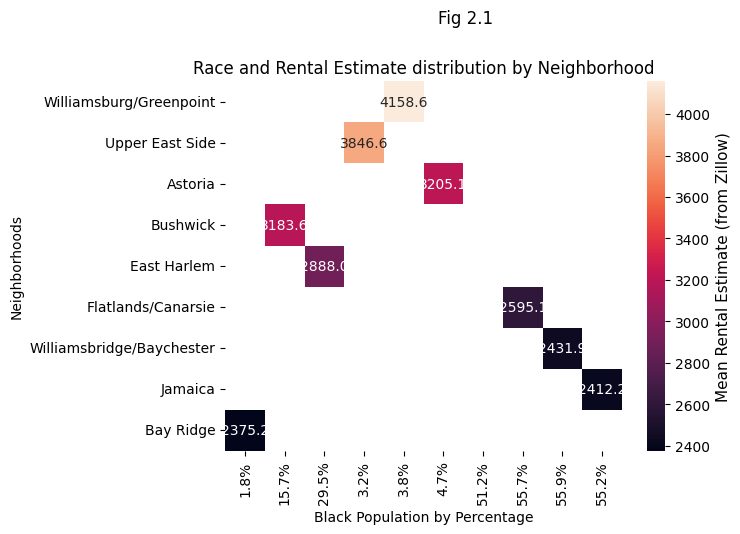

In [ ]:
# removing values that are not in both datasets
new_nyc_dem = demographics_df.drop(index = 8)

# creating a new dataframe for race and renat estimate heatmap
prices = zillow_df["AverageRent"]
prices = prices.reindex([7, 4, 2, 8, 5, 0, 3, 6, 1])
nyc_values = new_nyc_dem[['region_name','pop_race_black_pct']]
nyc_values['prices'] = prices.tolist()
nyc_values = nyc_values.pivot(index = 'region_name', columns = 'pop_race_black_pct', values = 'prices')


# changing order of neighborhoods from highest to lowest rental estimate for readability
nyc_values = nyc_values.reindex(["Williamsburg/Greenpoint", 'Upper East Side', "Astoria", "Bushwick", "East Harlem", "Flatlands/Canarsie", "Williamsbridge/Baychester", "Jamaica", "Bay Ridge"])

nyc_values.at['Jamaica', '55.2%'] = 2412.165388

# creates heatmap
map = sns.heatmap(nyc_values, annot = True, fmt = '.1f')
map.set(xlabel = 'Black Population by Percentage', ylabel = 'Neighborhoods')
cbar = map.collections[0].colorbar
cbar.set_label("Mean Rental Estimate (from Zillow)", fontsize = 11)
plt.title("Race and Rental Estimate distribution by Neighborhood")
plt.suptitle("Fig 2.1", fontsize=12, y=1.03)
plt.savefig("race_home_price_map.png", dpi=300, bbox_inches='tight')
plt.show()

![Heatmap showing relationship between Black population percentage and Zillow rental estimates across NYC neighborhoods](2.1_Race_and_Rental_Estimate_distribution_by_Neighborhood.png)

*Fig 2.1: Race and Rental Estimate Distribution by Neighborhood*


To visualize these relationships, we utilized bar graphs and heat maps. The first heat (Fig 2.1) map compared neighborhoods, Zestimate mean rental values, and racial compositions, ranking neighborhoods from highest to lowest rental value. A second heat map (Fig 2.2) compared racial composition and average family income, ranking neighborhoods from highest to lowest income levels. While the correlation between income and rental value was not as direct, we still noted meaningful patterns. For example, the Upper East Side and Williamsburg remained with the highest average incomes, while East Harlem and Williamsbridge ranked among the lowest. However, it’s notable that East Harlem—despite its low income level—has a Black population of less than 30%.

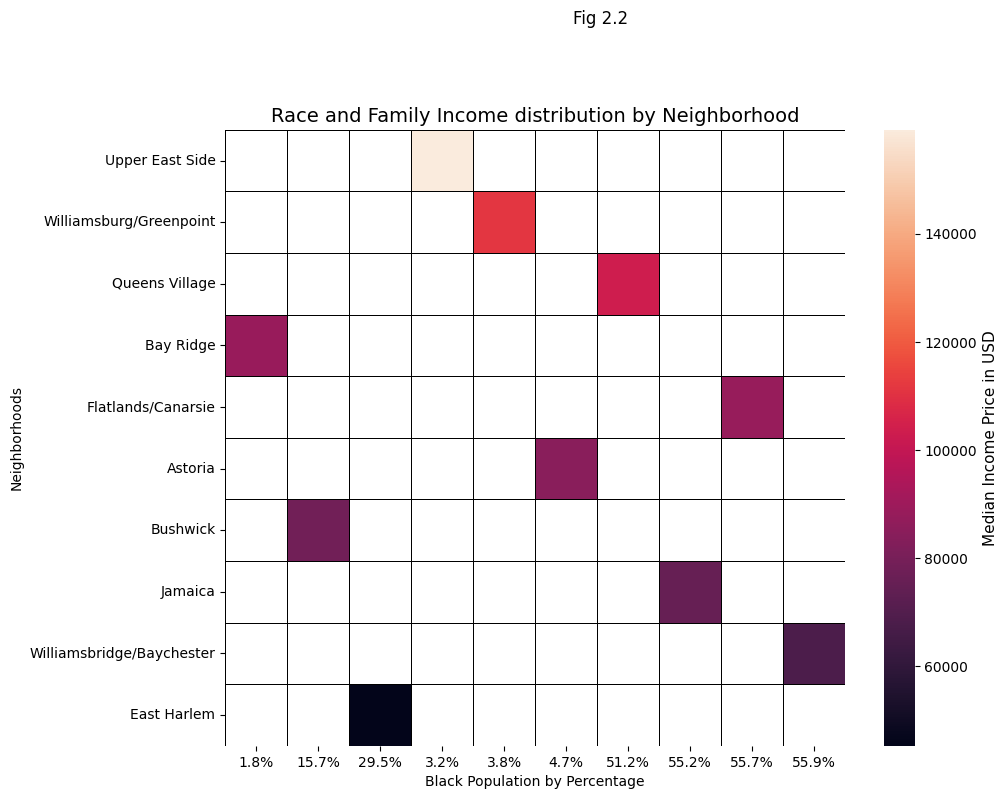

In [ ]:
incomes = pd.read_csv('Income by Neighborhood.csv')

# Select race and income values for heatmap
nyc_values2 = demographics_df[['region_name','pop_race_black_pct']]
income_values = [159241, 45233, 67973, 111492, 78456, 88566, 88188, 84590, 75235, 103300]
nyc_values2['incomes'] = income_values

# Pivot and reindex for ordered heatmap
nyc_values2 = nyc_values2.pivot(index = 'region_name', columns = 'pop_race_black_pct', values = 'incomes')
nyc_values2 = nyc_values2.reindex(['Upper East Side', "Williamsburg/Greenpoint", "Queens Village", "Bay Ridge", "Flatlands/Canarsie", "Astoria", "Bushwick", "Jamaica", "Williamsbridge/Baychester", "East Harlem"])

# Create plot
plt.figure(figsize=(10, 8))  # Optional: adjust figure size
map2 = sns.heatmap(nyc_values2, annot=False, linecolor='black', linewidths=0.5)
map2.set(xlabel='Black Population by Percentage', ylabel='Neighborhoods')

# Color bar labeling
cbar2 = map2.collections[0].colorbar
cbar2.set_label("Median Income Price in USD", fontsize=11)

# Titles
plt.suptitle("Fig 2.2", fontsize=12, y=1.03)
plt.title("Race and Family Income distribution by Neighborhood", fontsize=14)

# Optional: "Alt text" as metadata or for future use
# Alt text: Heatmap showing correlation between % Black population and median income across NYC neighborhoods

# Save figure with tight layout
plt.savefig("race_family_income.png", dpi=300, bbox_inches='tight')
plt.show()

![Heatmap showing correlation between % Black population and median income across NYC neighborhoods](2.2_Race_and_Family_Income_distribution_by_Neighborhood.png)

*Fig 2.2: Race and Family Income Distribution by Neighborhood*


These heat maps allowed us to explore the complex relationship between race, income, and algorithmic pricing models in NYC neighborhoods. Our findings suggest that racial demographics may have a more significant impact on estimated rental values than income alone, highlighting potential biases in pricing algorithms and housing markets.

## **Results**
### 1. Due to AI-driven pricing models, are housing prices inflated more in some demographic regions?

Yes. A comparison between Zillow’s median home prices and the demographic composition of NYC neighborhoods reveals a pattern of inflated home values in areas with higher percentages of white residents. This is evident when analyzing the “Median Home Prices by Neighborhood (Zillow, June 2021)” graph alongside demographic heatmaps. Neighborhoods like the Upper East Side and Williamsburg/Greenpoint, which have predominantly white populations, show significantly higher median home prices than areas with predominantly Black populations, such as East Harlem or Williamsbridge/Baychester. These disparities suggest that Zillow's pricing algorithm may be reflecting and reinforcing existing racial disparities in the housing market.



### 2. How do algorithmic predictions compare to actual market trends in diverse socioeconomic neighborhoods?

While Zillow’s algorithm generally tracks broad market trends, our analysis reveals notable discrepancies in neighborhoods with more racially and economically diverse populations. In particular, Zestimate values often deviate from actual rental market activity in neighborhoods with larger Black and Latinx populations. These deviations raise concerns about the presence of systemic bias in the algorithm’s predictive model, potentially underestimating home values in minority communities compared to more affluent, predominantly white areas.



### 3. What demographic factors correlate most strongly with discrepancies in AI-predicted versus actual home values?

Our comparison of racial composition, median family income, and Zillow rent estimates across neighborhoods suggests that race is a stronger predictor of price discrepancy than income. Neighborhoods with higher percentages of Black residents are consistently undervalued by Zillow’s algorithm, even when their median incomes are comparable to other areas. For instance, East Harlem and Bushwick exhibit lower Zestimate values despite median incomes that do not differ drastically from higher-valued neighborhoods. This pattern indicates potential racial bias embedded within the valuation algorithm and reflects broader structural inequalities in the housing market.



### 4. How does short-term rental activity (Airbnb) influence AI-driven New York Metro Area price estimates?

Our data shows a strong positive correlation between Airbnb listing prices and Zillow’s rent estimates. Neighborhoods with higher Airbnb median rental prices—such as Williamsburg/Greenpoint and the Upper East Side—also exhibited higher Zestimate values. This suggests that short-term rental activity exerts upward pressure on AVM-generated estimates, likely because Airbnb profitability signals strong market demand. This influence may amplify housing costs in already gentrified or rapidly changing neighborhoods, further contributing to displacement risks and affordability issues.


## **Discussion**

The objective of this study was to examine whether AI pricing models like Zillow's Zestimate reflect or duplicate racial and socioeconomic disparities in New York City's housing market. Through investigating the alignment of Zillow home value estimates, Airbnb listing prices, and neighborhood demographic data for nine NYC neighborhoods, we detected robust evidence that algorithmic value models consistently overestimate homes in majority-white communities and underestimate homes in majority-Black communities. In addition, we found that short-term renting activity, as indicated by Airbnb median listing prices, correlates strongly with Zillow's rent estimations, further entangling real estate value with market forces disproportionately affecting affordability in gentrifying communities.

These findings are supported by heatmaps, bar plots, and statistical summaries revealing comparable geographic patterns: neighborhoods such as the Upper East Side and Williamsburg/Greenpoint both had greater Zestimate values and greater percentages of white residents, whereas neighborhoods such as East Harlem and Williamsbridge/Baychester, with higher Black and Latinx populations, had dramatically lower valuations. Interestingly, this trend persisted even when mediating on median household income, implying racial makeup had an even stronger connection to estimated property values than income alone.
Our results are in line with and augment existing literature on algorithmic bias in the housing market. As the work of Fu et al. (2020) shows, the Zestimate model differentially impacts housing prices by race, with rampant undervaluation of homes in African American neighborhoods. Acolin and Wachter (2022) also decry algorithmic opacity in residential models, showing that biased outputs may result even where biased inputs do not exist. Our findings support such worries, demonstrating how the dependence on tax data, user-inputs, and market feedback loops can reproduce underlying structural inequalities. Additionally, our study contributes to ethical regulation of algorithmic decision-making by expanding methodologies like the Disparate Impact Rule—frequently used in employment discrimination law—into housing market pricing predictions.

However, our analysis is also subject to a few limitations. To start, we examined only nine NYC neighborhoods due to time and data constraints. While this allowed for a manageable and diverse comparative sample, it limits the generalizability of our results to the whole city or other locales. Furthermore, our comparison between Airbnb listings and Zestimate data had two distinct time periods: Airbnb prices were sampled for one month, and Zillow estimates were averaged over 12 months. While this method delivered a snapshot of price correlation, it may not reflect seasonal variations or long-term rental patterns.

We also recognize methodological constraints regarding data validity. User-provided data in Zestimate enters factors based on listing and tax records, but such tax and listing records are incomplete and biased, particularly in newly arrived immigrant or poorer communities where house enhancements or ownership records are not properly recorded. Likewise, Airbnb data are scraped from public listings and exclude properties that were delisted or misclassified. Demographic data, while derived from a reliable source (NYU Furman Center via the U.S. Census), are static and may not reflect recent demographic shifts.

With these limitations, our ability to make inferential inferences or predictive statements to new data is restricted. The effort is most essentially exploratory and diagnostic: it identifies trends of potential bias but does not determine causality. A more robust analysis would utilize longitudinal housing data, direct examination of model weights and inputs, and wider neighborhood coverage. Future studies could use regression modeling or causal inference techniques to identify which variables—race, income, Airbnb penetration—most significantly influence valuation divergences.

From an ethical standpoint, our findings indicate fairness issues in algorithmic pricing systems. If AVMs like Zillow's are used to inform rent or mortgage prices, they can encourage displacement, gentrification, and inequality of wealth—especially if their estimates are race-correlated biases. Or, increased sensitivity to these disparities can inform public policy, transparency regulations, and algorithmic audits. Strengths of this work are that it contributes to the growing evidence base supporting responsible AI practice in housing, and the threats underscore the importance of critical data governance, especially in high-risk domains like property.


## **References**

- Acolin, A., & Wachter, S. (2022). *Algorithmic discrimination in housing markets: A review*. Housing Policy Debate, 32(5), 783–802. [https://doi.org/10.1080/10511482.2022.2113815](https://doi.org/10.1080/10511482.2022.2113815)

- Angwin, J., Larson, J., Mattu, S., & Kirchner, L. (2016). *Machine bias*. ProPublica. [https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)

- Barocas, S., & Selbst, A. D. (2016). *Big data's disparate impact*. California Law Review, 104(3), 671–732. [https://doi.org/10.15779/Z38BG31](https://doi.org/10.15779/Z38BG31)

- Fu, Y., Wangsawatwong, T., & Xiao, S. (2020). *Unequal impact of Zestimate on the housing market*. National Bureau of Economic Research Working Paper No. 29880. [Link to PDF](https://www-2.rotman.utoronto.ca/userfiles/brownbags/marketing/files/Unequal%20Impact%20of%20Zestimate%20on%20the%20Housing%20Market%20(002).pdf)

- Inside Airbnb. (2025). *Data on Airbnb listings*. Retrieved from [http://insideairbnb.com/](http://insideairbnb.com/)

- NYU Furman Center. (2023). *CoreData.nyc*. Retrieved from [https://coredata.nyc/](https://coredata.nyc/)

- Zillow Research. (2024). *Zillow Observed Rent Index (ZORI)*. Retrieved from [https://www.zillow.com/research/data/](https://www.zillow.com/research/data/)
